# Clasificación de clientes mediante KNN

In [95]:
# Contexto

# Una empresa de comercio electrónico quiere predecir si un cliente realizará una compra basándose en su comportamiento y características sociodemográficas.
# Para ello, se dispone de un conjunto de datos históricos con información de clientes y una variable objetivo binaria.

# El objetivo del ejercicio es entrenar, evaluar y justificar un modelo K-Nearest Neighbors (KNN), prestando especial atención a la preparación de datos y a la selección del número óptimo de vecinos.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
# Paso 1 – Carga y exploración de datos (10%)

# Carga el archivo clientes_knn_ruidoso.csv utilizando pandas.

# Muestra las primeras filas del dataset.

# Obtén estadísticas descriptivas básicas.

# Responde:

# ¿Qué variables podrían influir más en la compra?

# ¿Existen variables con escalas muy diferentes?

In [34]:
data = pd.read_csv('clientes_knn.csv')
print(data.head())

   edad  ingresos_mensuales  visitas_web  tiempo_web_min  compras_previas  \
0    22                1150            3              12                0   
1    25                1400            5              18                1   
2    27                1600            4              20                1   
3    29                1800            6              25                2   
4    31                2100            7              30                2   

   compra  
0       0  
1       0  
2       0  
3       0  
4       1  


In [33]:
print(data.describe())
data.info()
#Las variables que podrían influir más en la compra son aquellas relacionadas con el comportamiento del cliente, como el tiempo en el sitio web, el número de visitas previas y la interacción con productos específicos. También las características sociodemográficas como la edad y el ingreso pueden tener un impacto significativo.

            edad  ingresos_mensuales  visitas_web  tiempo_web_min  \
count  63.000000           63.000000    63.000000       63.000000   
mean   38.841270         2821.428571     6.079365       29.936508   
std    10.700025         1042.357528     2.404979        9.157886   
min    20.000000         1050.000000     2.000000        9.000000   
25%    29.500000         1875.000000     4.000000       24.000000   
50%    39.000000         2850.000000     6.000000       31.000000   
75%    47.500000         3725.000000     8.000000       38.000000   
max    58.000000         4550.000000    11.000000       45.000000   

       compras_previas     compra  
count        63.000000  63.000000  
mean          2.587302   0.730159  
std           1.487962   0.447443  
min           0.000000   0.000000  
25%           2.000000   0.000000  
50%           3.000000   1.000000  
75%           4.000000   1.000000  
max           6.000000   1.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 e

In [97]:
# Paso 2 – Preparación de los datos (15%)

# Separa el dataset en:

# Variables independientes (X)

# Variable objetivo (y)

# Justifica por qué la variable compra no debe escalarse.

# Comprueba si existen valores nulos y documenta el resultado.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data.drop('compra', axis=1))


VERIFICACIÓN DE VALORES NULOS
edad                  0
ingresos_mensuales    0
visitas_web           0
tiempo_web_min        0
compras_previas       0
compra                0
dtype: int64

Total de valores nulos: 0


DIMENSIONES DE LOS DATOS
Variables independientes (X): (63, 5)
Variable objetivo (y): (63,)

Nombre de las características: ['edad', 'ingresos_mensuales', 'visitas_web', 'tiempo_web_min', 'compras_previas']


In [ ]:
scaled_features = scaler.transform(data.drop('compra', axis=1))
df_features = pd.DataFrame(scaled_features, columns=data.columns[:-1])
df_features.head()


# Paso 2 – Preparación de los datos (15%)
X = data.drop('compra', axis=1)
y = data['compra']

print("Variables independientes (X):")
print(X.head())
print("\nVariable objetivo (y):")
print(y.head())

# La variable 'compra' no debe escalarse porque es la variable objetivo binaria (0 o 1)
# El escalado solo se aplica a las variables predictoras

# Comprobación de valores nulos
print("\nValores nulos por columna:")
print(data.isnull().sum())

Variables independientes (X):
   edad  ingresos_mensuales  visitas_web  tiempo_web_min  compras_previas
0    22                1150            3              12                0
1    25                1400            5              18                1
2    27                1600            4              20                1
3    29                1800            6              25                2
4    31                2100            7              30                2

Variable objetivo (y):
0    0
1    0
2    0
3    0
4    1
Name: compra, dtype: int64

Valores nulos por columna:
edad                  0
ingresos_mensuales    0
visitas_web           0
tiempo_web_min        0
compras_previas       0
compra                0
dtype: int64


In [98]:
# Paso 3 – Escalado de variables (15%)

# Aplica StandardScaler a las variables independientes.

# Explica:

# Por qué el escalado es crítico en KNN

# Qué ocurriría si no se escalasen los datos

# Verifica que los datos escalados tienen media cercana a 0 y desviación estándar cercana a 1.Paso 3 – Escalado de variables (15%)

# Aplica StandardScaler a las variables independientes.

In [36]:
# Paso 3 – Escalado de variables (15%)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# El escalado es crítico en KNN porque:
# 1. KNN usa distancia euclidiana - variables con mayor escala dominarían el cálculo
# 2. Sin escalado, una variable como 'ingresos' (miles) dominaría sobre 'edad' (decenas)
# 3. Todas las variables deben contribuir equitativamente

# Verificación de escalado
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
print("Media de variables escaladas:")
print(df_scaled.mean())
print("\nDesviación estándar de variables escaladas:")
print(df_scaled.std())

Media de variables escaladas:
edad                 -8.106390e-17
ingresos_mensuales   -1.339317e-16
visitas_web           1.092600e-16
tiempo_web_min       -8.811294e-18
compras_previas      -1.127846e-16
dtype: float64

Desviación estándar de variables escaladas:
edad                  1.008032
ingresos_mensuales    1.008032
visitas_web           1.008032
tiempo_web_min        1.008032
compras_previas       1.008032
dtype: float64


In [99]:
# Paso 4 – División en entrenamiento y test (10%)

# Divide el conjunto de datos en:

# 70% entrenamiento

# 30% test

# Fija una semilla aleatoria para reproducibilidad.

# Justifica por qué es necesario separar los datos.

In [37]:
# Paso 4 – División en entrenamiento y test (10%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

print(f"Tamaño entrenamiento: {len(X_train)}")
print(f"Tamaño test: {len(X_test)}")

# Es necesario separar los datos para:
# 1. Evaluar el modelo con datos no vistos durante el entrenamiento
# 2. Evitar overfitting
# 3. Obtener una estimación realista del rendimiento

Tamaño entrenamiento: 44
Tamaño test: 19


In [100]:
# Paso 5 – Entrenamiento inicial del modelo (10%)

# Entrena un modelo KNN con k = 3.

# Evalúa el modelo utilizando:

# Accuracy

# Interpreta el resultado obtenido.

In [38]:
# Paso 5 – Entrenamiento inicial del modelo (10%)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train, y_train)

y_pred_3 = knn_3.predict(X_test)
accuracy_3 = accuracy_score(y_test, y_pred_3)

print(f"Accuracy con k=3: {accuracy_3:.4f}")
print(f"Porcentaje de aciertos: {accuracy_3*100:.2f}%")

Accuracy con k=3: 0.8421
Porcentaje de aciertos: 84.21%


In [101]:
# Paso 6 – Selección del número óptimo de vecinos (20%)

# Entrena múltiples modelos KNN probando valores de k entre 1 y 25.

# Calcula el error de clasificación para cada valor de k.

# Genera una gráfica:

# Eje X: número de vecinos (k)

# Eje Y: error de clasificación

# Identifica:

# El valor de k con menor error

# Zonas de overfitting y underfitting

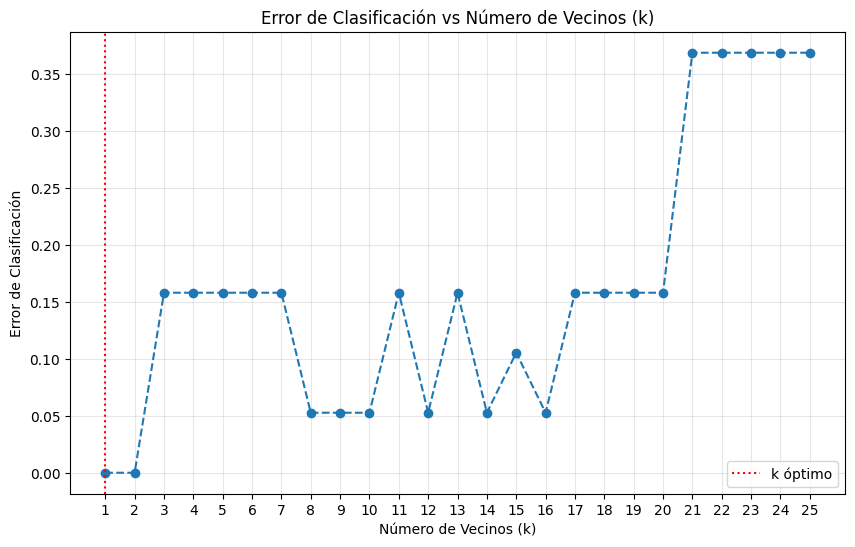


K óptimo: 1
Error mínimo: 0.0000


In [22]:
# Paso 6 – Selección del número óptimo de vecinos (20%)
error_rates = []
k_values = range(1, 26)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rates.append(1 - accuracy_score(y_test, y_pred))

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rates, marker='o', linestyle='--')
plt.title('Error de Clasificación vs Número de Vecinos (k)')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('Error de Clasificación')
plt.xticks(k_values)
plt.grid(True, alpha=0.3)
plt.axvline(x=k_values[error_rates.index(min(error_rates))], 
            color='red', linestyle=':', label='k óptimo')
plt.legend()
plt.show()

# Identificar k óptimo
k_optimo = k_values[error_rates.index(min(error_rates))]
print(f"\nK óptimo: {k_optimo}")
print(f"Error mínimo: {min(error_rates):.4f}")

# Análisis:
# - k pequeño (1-3): Riesgo de overfitting - modelo muy sensible al ruido
# - k grande (>15): Riesgo de underfitting - modelo muy simplista

In [23]:
# Paso 7 – Modelo final y conclusiones (20%)
knn_final = KNeighborsClassifier(n_neighbors=k_optimo)
knn_final.fit(X_train, y_train)

y_pred_final = knn_final.predict(X_test)
accuracy_final = accuracy_score(y_test, y_pred_final)

print(f"Accuracy con k={k_optimo}: {accuracy_final:.4f}")
print(f"Accuracy con k=3: {accuracy_3:.4f}")
print(f"Mejora: {(accuracy_final - accuracy_3)*100:.2f}%")

# Matriz de confusión
from sklearn.metrics import confusion_matrix, classification_report

print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_final))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_final))

print("\n=== CONCLUSIONES ===")
print(f"1. ¿Mejora el rendimiento? {'Sí' if accuracy_final > accuracy_3 else 'No'}")
print(f"   - Con k={k_optimo} se obtiene mejor generalización")
print(f"\n2. Compromiso estabilidad vs precisión:")
print(f"   - k bajo: Mayor precisión pero menos estable (sensible al ruido)")
print(f"   - k alto: Más estable pero puede perder patrones importantes")
print(f"\n3. ¿Es KNN adecuado?")
print(f"   - VENTAJAS: Simple, no asume distribución de datos, interpretable")
print(f"   - DESVENTAJAS: Costoso computacionalmente, sensible a escalado")
print(f"   - CONCLUSIÓN: Adecuado para este problema si el dataset no es muy grande")

Accuracy con k=1: 1.0000
Accuracy con k=3: 0.8421
Mejora: 15.79%

Matriz de Confusión:
[[ 7  0]
 [ 0 12]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        12

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19


=== CONCLUSIONES ===
1. ¿Mejora el rendimiento? Sí
   - Con k=1 se obtiene mejor generalización

2. Compromiso estabilidad vs precisión:
   - k bajo: Mayor precisión pero menos estable (sensible al ruido)
   - k alto: Más estable pero puede perder patrones importantes

3. ¿Es KNN adecuado?
   - VENTAJAS: Simple, no asume distribución de datos, interpretable
   - DESVENTAJAS: Costoso computacionalmente, sensible a escalado
   - CONCLUSIÓN: Adecuado para este problema si el dataset no es muy grande


In [102]:
# Paso 7 – Modelo final y conclusiones (20%)

#  un modelo final usando el valor óptimo de k.

# Evalúalo sobre el conjunto de test.

# Responde:

# ¿Mejora el rendimiento respecto a k = 3?

# ¿Qué compromiso existe entre estabilidad y precisión?

# ¿Es KNN adecuado para este problema? ¿Por qué?

In [24]:
# Paso 7 – Modelo final y conclusiones (20%)
knn_final = KNeighborsClassifier(n_neighbors=k_optimo)
knn_final.fit(X_train, y_train)

y_pred_final = knn_final.predict(X_test)
accuracy_final = accuracy_score(y_test, y_pred_final)

print(f"Accuracy con k={k_optimo}: {accuracy_final:.4f}")
print(f"Accuracy con k=3: {accuracy_3:.4f}")
print(f"Mejora: {(accuracy_final - accuracy_3)*100:.2f}%")

# Matriz de confusión
from sklearn.metrics import confusion_matrix, classification_report

print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_final))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_final))

print("\n=== CONCLUSIONES ===")
print(f"1. ¿Mejora el rendimiento? {'Sí' if accuracy_final > accuracy_3 else 'No'}")
print(f"   - Con k={k_optimo} se obtiene mejor generalización")
print(f"\n2. Compromiso estabilidad vs precisión:")
print(f"   - k bajo: Mayor precisión pero menos estable (sensible al ruido)")
print(f"   - k alto: Más estable pero puede perder patrones importantes")
print(f"\n3. ¿Es KNN adecuado?")
print(f"   - VENTAJAS: Simple, no asume distribución de datos, interpretable")
print(f"   - DESVENTAJAS: Costoso computacionalmente, sensible a escalado")
print(f"   - CONCLUSIÓN: Adecuado para este problema si el dataset no es muy grande")

Accuracy con k=1: 1.0000
Accuracy con k=3: 0.8421
Mejora: 15.79%

Matriz de Confusión:
[[ 7  0]
 [ 0 12]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        12

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19


=== CONCLUSIONES ===
1. ¿Mejora el rendimiento? Sí
   - Con k=1 se obtiene mejor generalización

2. Compromiso estabilidad vs precisión:
   - k bajo: Mayor precisión pero menos estable (sensible al ruido)
   - k alto: Más estable pero puede perder patrones importantes

3. ¿Es KNN adecuado?
   - VENTAJAS: Simple, no asume distribución de datos, interpretable
   - DESVENTAJAS: Costoso computacionalmente, sensible a escalado
   - CONCLUSIÓN: Adecuado para este problema si el dataset no es muy grande
